<h1>Lab 3 LLP Simulated Data</h1>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import uproot
import seaborn as sns
import math

<h3>Creating a Data Frame for LLP</h3>

In [2]:
#Takes a given data file and converts it into a table
def readFile(file, labels):
    dataFile = uproot.open(file)
    dataKey = dataFile.keys()
    i = 0
    while i < len(dataKey):
        tree = dataFile[dataKey[i]]
        i += 1
    dataFrame = tree.pandas.df(labels)
    return dataFrame

df1 = readFile(file = "df_1.root", labels = ["Jet*","Lx", "Ly", "Lz","IsLLP"])
display(df1)

,JetPt,JetEta,JetPhi,Lx,Ly,Lz,IsLLP
entry,,,,,,,
0,50.151355,1.767030,0.074290,1851.684326,178.223892,5354.035156,True
1,45.315016,1.088594,0.364831,0.000000,0.000000,0.000000,False
2,163.244844,1.709549,2.769850,609.158691,239.010056,1741.357788,True
3,147.121187,-0.237002,-0.393413,0.000000,0.000000,0.000000,False
4,54.661199,-0.730161,-2.550338,0.000000,0.000000,0.000000,False
...,...,...,...,...,...,...,...
22571,76.296273,1.114254,-1.709045,259.214996,2172.912354,3113.421875,True
22572,53.958059,0.729737,2.172977,499.816559,714.238342,664.080627,True
22573,44.355902,-1.914020,-1.443047,0.000000,0.000000,0.000000,False


<h3>Creating Histograms For Each Plot</h3>

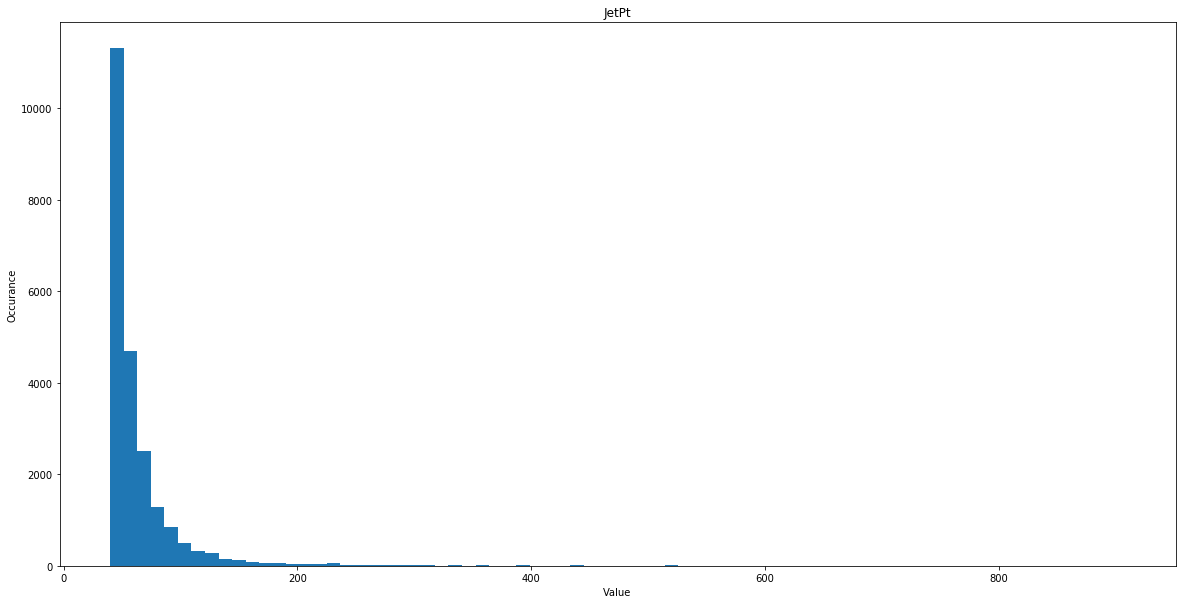

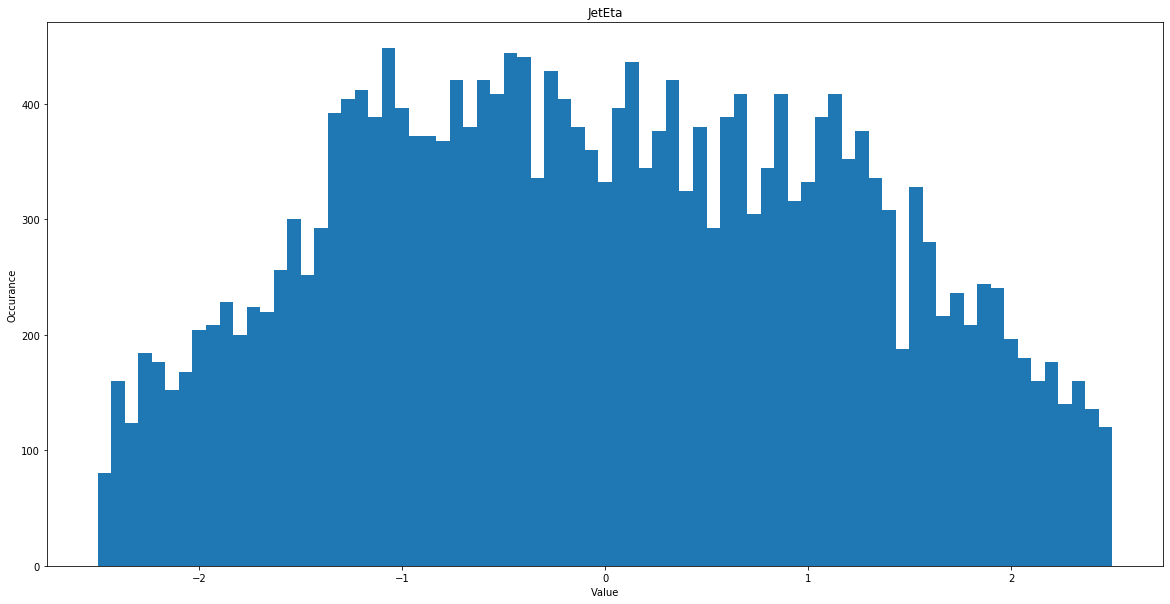

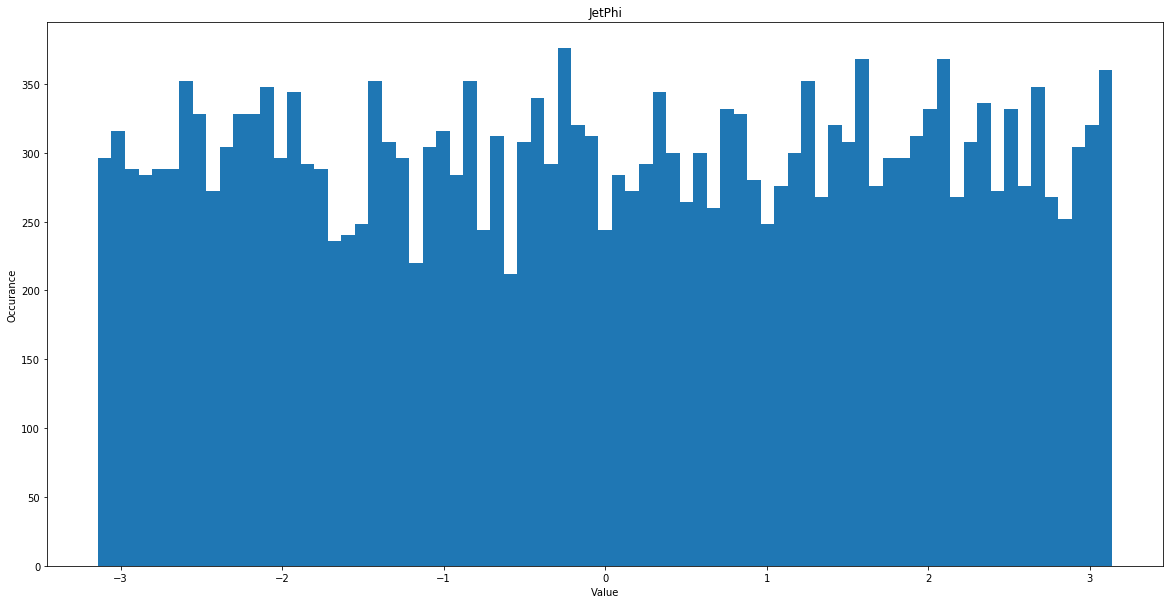

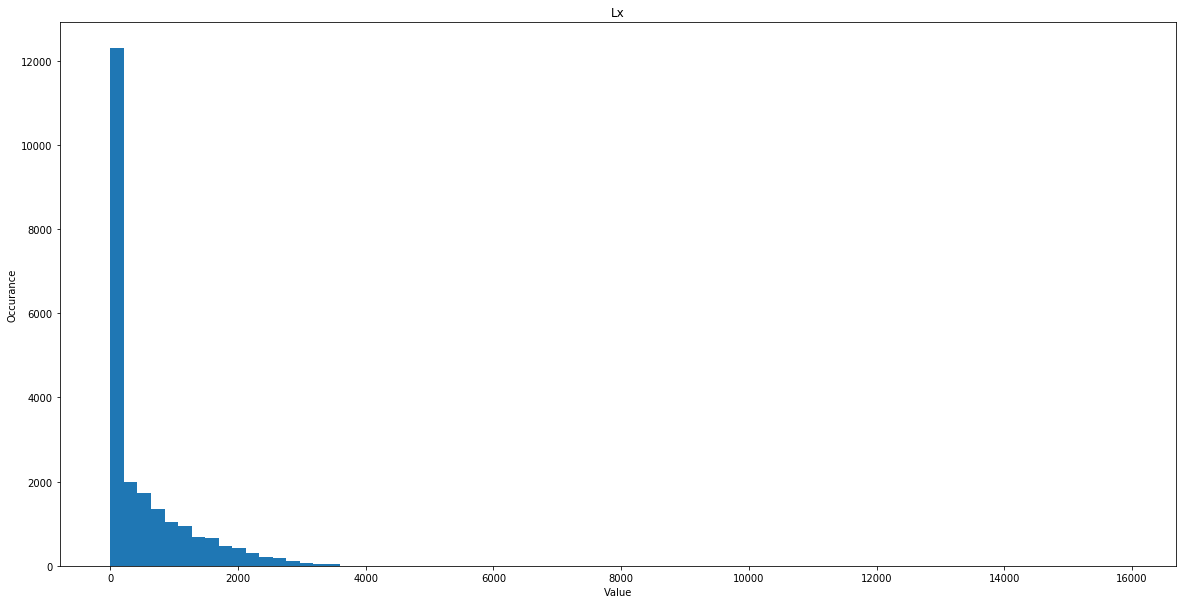

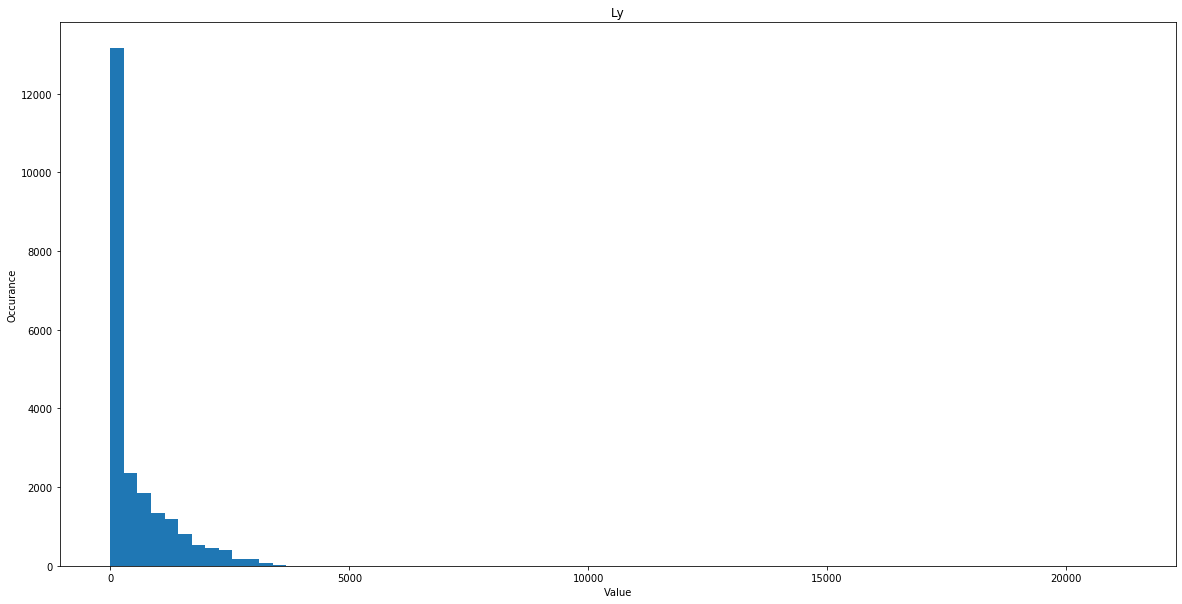

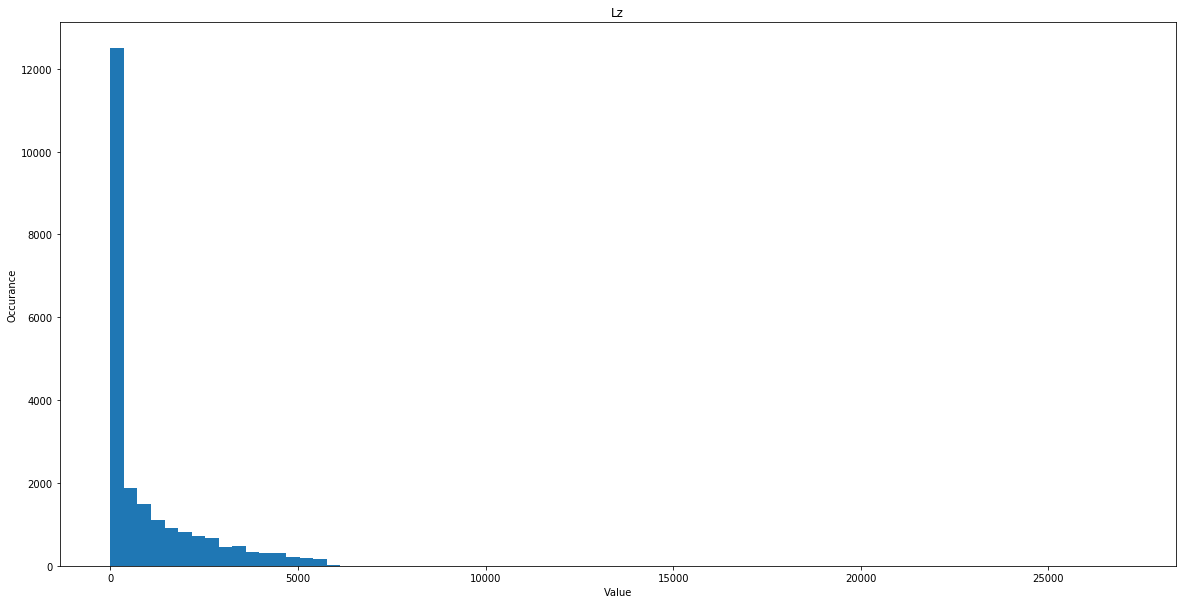

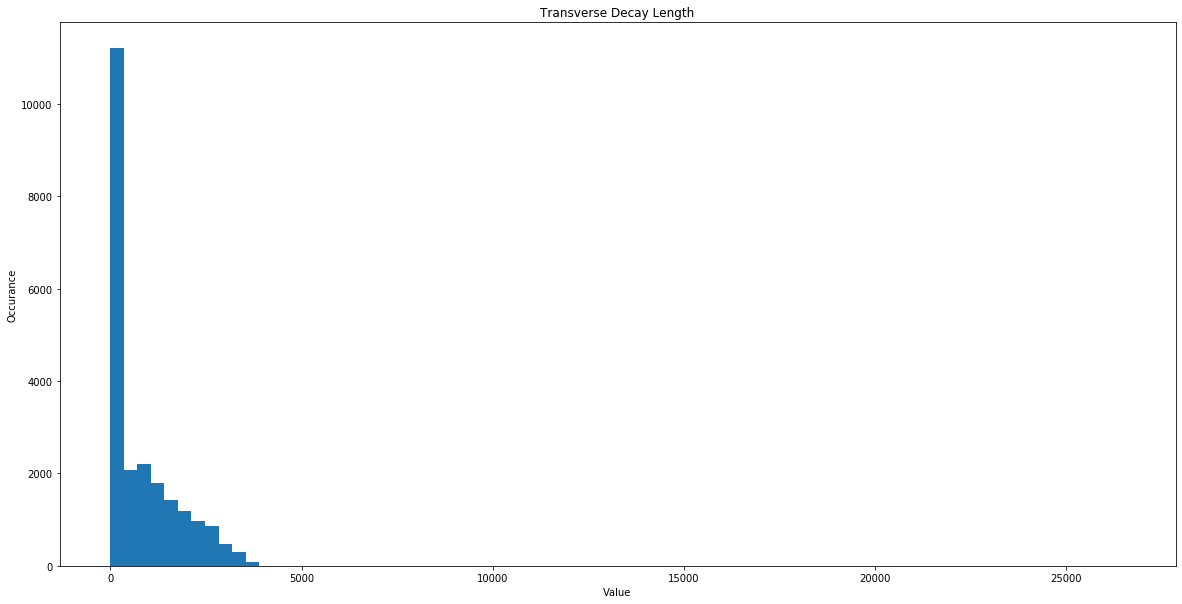

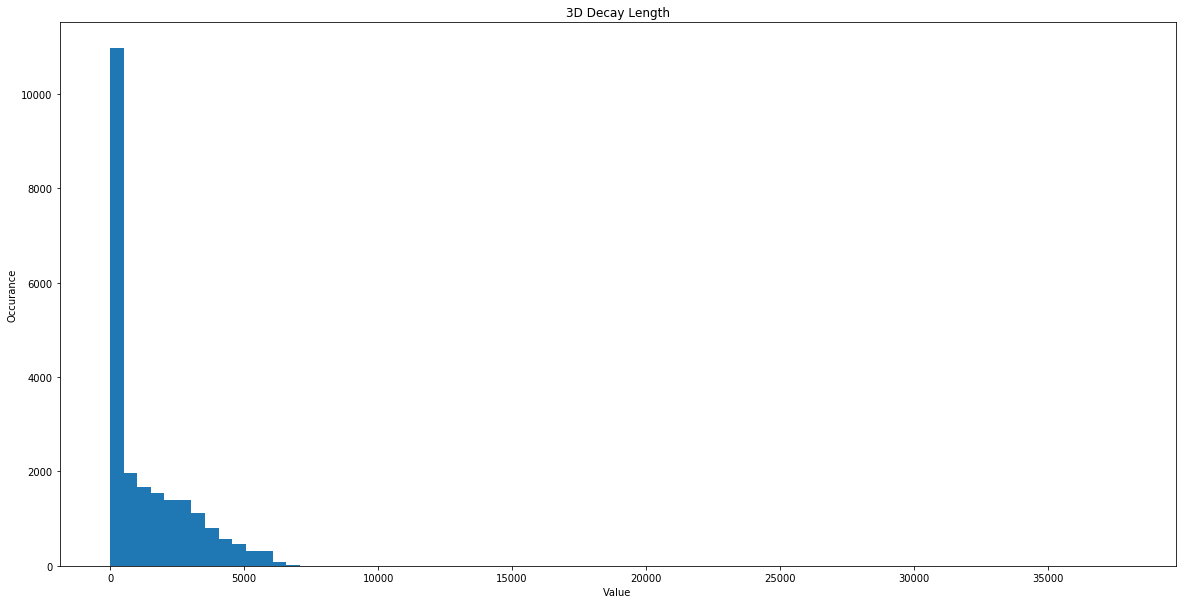

In [3]:
#Removes the IsLLP because you can not graph a boolean
df1temp = readFile(file = "df_1.root", labels = ["Jet*","Lx", "Ly", "Lz"]) 

#Calculates the transverse decay length and 3D decay length
df1temp['Transverse Decay Length'] = np.sqrt(df1temp['Lx']**2 + df1temp['Ly']**2)
df1temp['3D Decay Length'] = np.sqrt(df1temp['Lx']**2 + df1temp['Ly']**2 + df1temp['Lz']**2)

    
#Creates Histogram of given stat
def histPlot(x, title):
    plt.rcParams["figure.figsize"] = [20, 10]
    plt.hist(x, bins = 75)
    plt.xlabel("Value")
    plt.ylabel("Occurance")
    plt.title(title)
    plt.show()
    
#Goes through all the different stats
for index in df1temp.iteritems():
    histPlot(x = index[1], title = index[0]) 

<h3>Merging Data Sets</h3>

In [4]:
#Reading in the other files
df2 = readFile(file = "df_2.root", labels = ["Jet*","Lx", "Ly", "Lz","IsLLP"])
df3 = readFile(file = "df_3.root", labels = ["Jet*","Lx", "Ly", "Lz","IsLLP"])
df4 = readFile(file = "df_4.root", labels = ["Jet*","Lx", "Ly", "Lz","IsLLP"])
df5 = readFile(file = "df_5.root", labels = ["Jet*","Lx", "Ly", "Lz","IsLLP"])
df6 = readFile(file = "df_6.root", labels = ["Jet*","Lx", "Ly", "Lz","IsLLP"])

#Introducing a Data Frame marker to keep track which data frame it represents
df1['df'] = 'df1'
df2['df'] = 'df2'
df3['df'] = 'df3'
df4['df'] = 'df4'
df5['df'] = 'df5'
df6['df'] = 'df6'

#Creating one big data frame containing all the information
dataSet = np.empty(6, dtype = object)
dataSet[:] = [df1, df2, df3, df4, df5, df6]

#Calculates the decay length
def decayLength(df):
    df['Decay Length 2D'] = np.sqrt(df['Lx']**2 + df['Ly']**2)
    df['Decay Length 3D'] = np.sqrt(df['Lx']**2 + df['Ly']**2 + df['Lz']**2)

for dataf in dataSet:
    decayLength(dataf)

dataSet1 = pd.concat(dataSet, ignore_index = True)

All of the information from the files have now all been compiled into a single data frame with an identification label to their corresponding file.

<h3>Comparing Data Between Data Frames</h3>

<h5>Jet pT Violin Plot</h5>

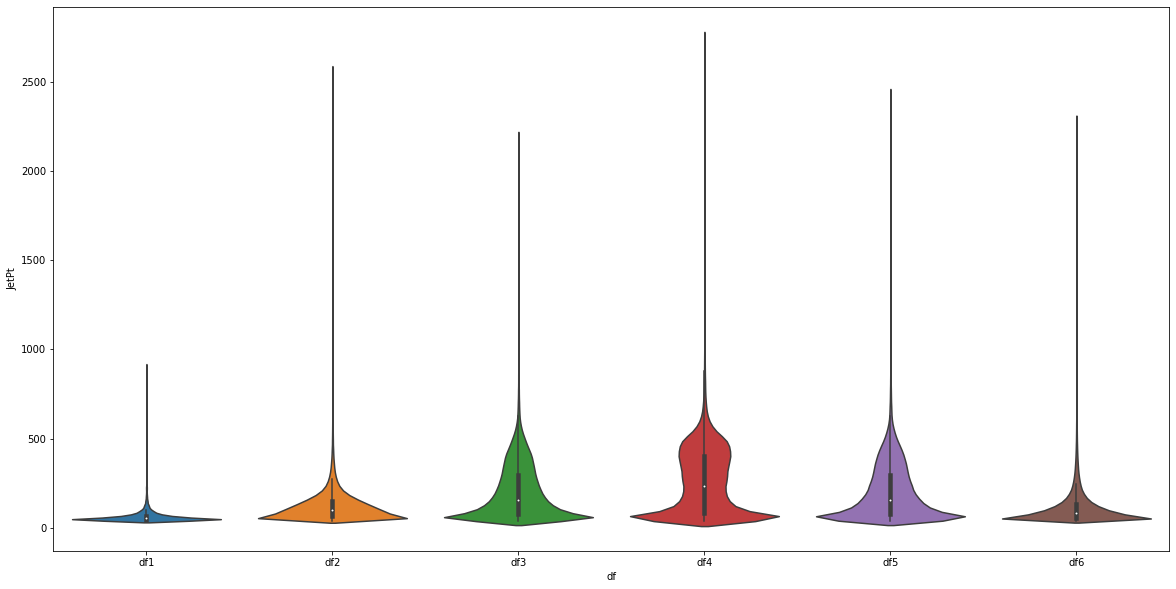

In [5]:
#Creates a plot comparing JetPt of all the data frames
sns.violinplot(data = dataSet1, x = 'df', y = "JetPt", scale = 'width')

<h5>2D Decay Length Violin Plot</h5>

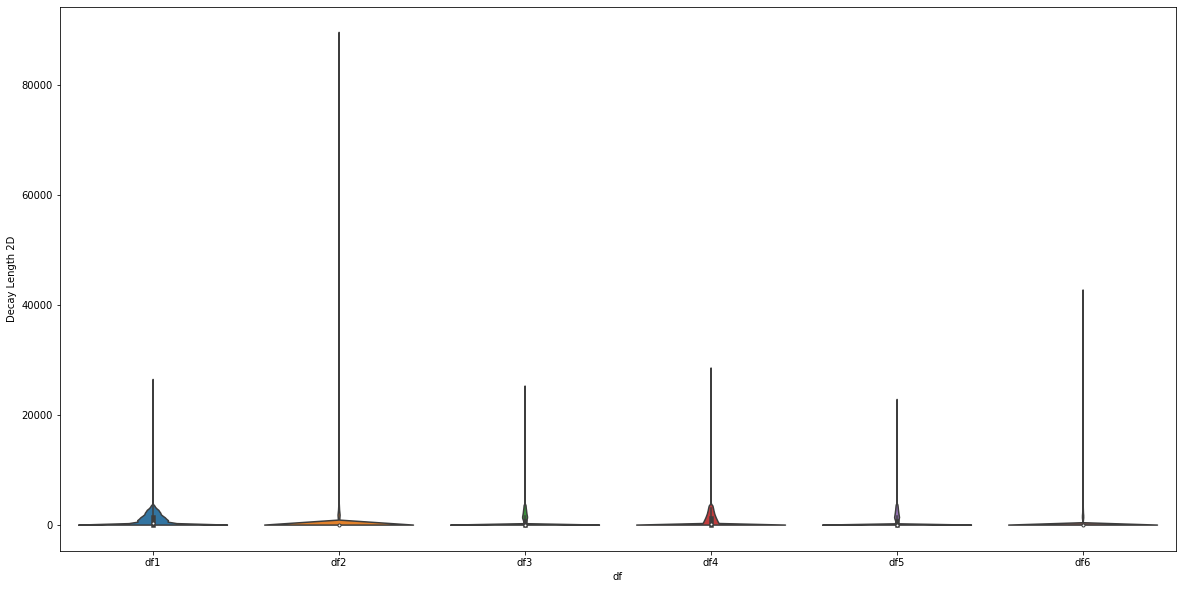

In [15]:
sns.violinplot(data = dataSet1, x = 'df', y = "Decay Length 2D", cut = 0, scale = 'width')

<h5>3D Decay Length Violin Plot</h5>

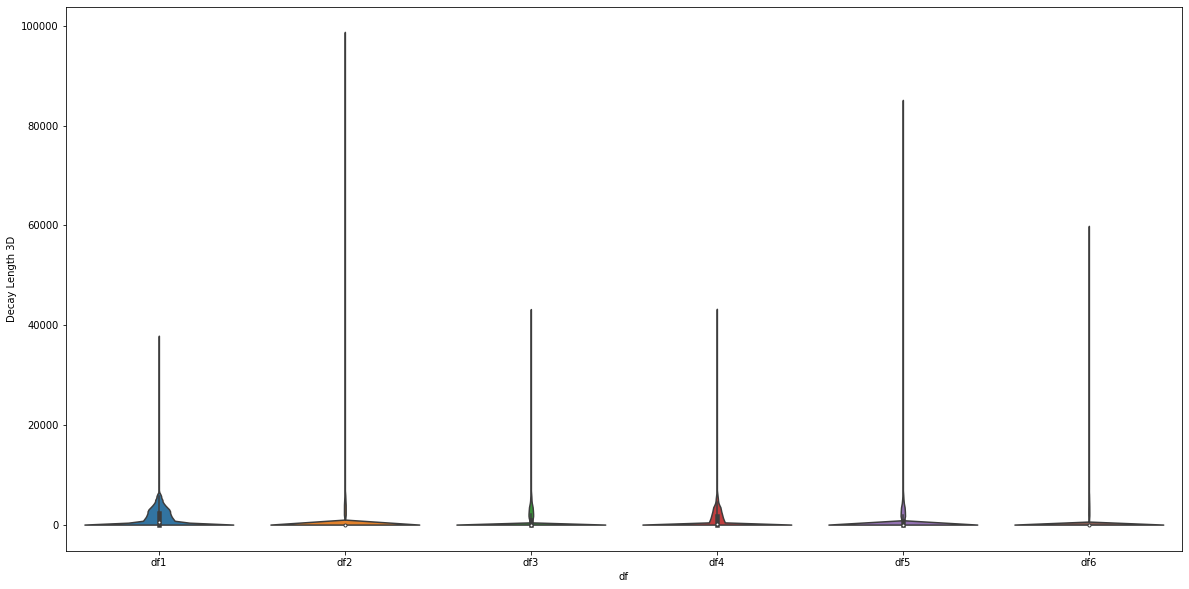

In [7]:
sns.violinplot(data = dataSet1, x = 'df', y = "Decay Length 3D", cut = 0, scale = 'width')

<h3>Seperating Data Based On LLP</h3>

<h5>Jet pT Violin Plot With LLP Separation</h5>

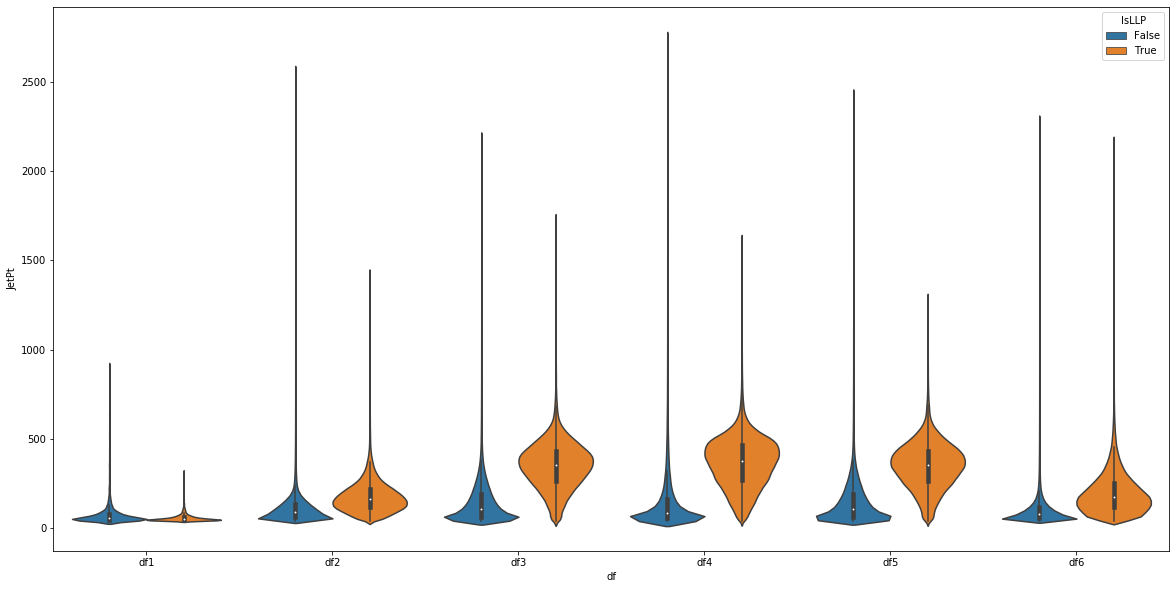

In [8]:
#Seperates the data by LLP
sns.violinplot(data = dataSet1, x = 'df', y = 'JetPt', hue = 'IsLLP', scale = 'width')

<h5>2D Decay Length With LLP Separation</h5>

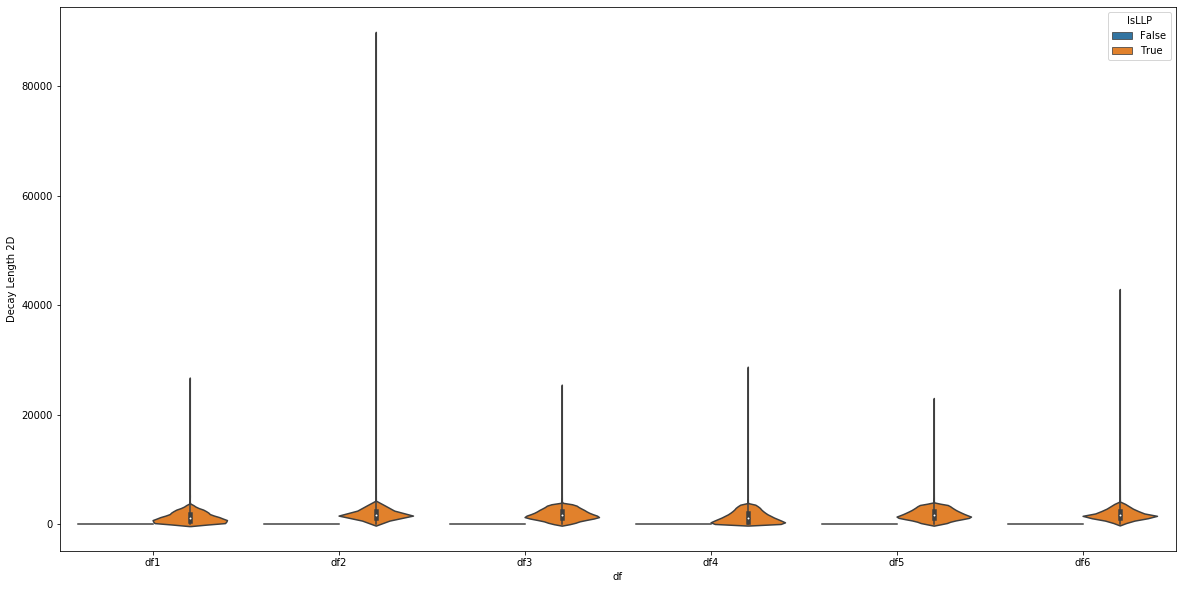

In [9]:
sns.violinplot(data = dataSet1, x = 'df', y = 'Decay Length 2D', hue = 'IsLLP', scale = 'width')

<h5>3D Decay Length Violin Plot With LLP Separation</h5>

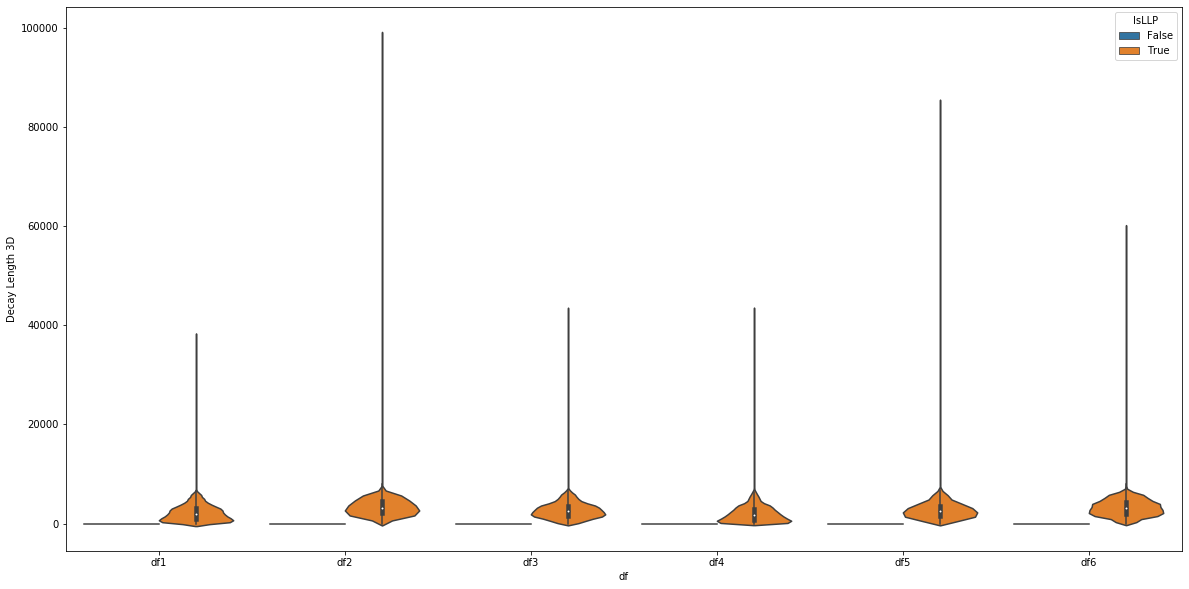

In [10]:
sns.violinplot(data = dataSet1, x = 'df', y = 'Decay Length 3D', hue = 'IsLLP', scale = 'width')

<h3>Relationship Between 2D Decay Length and Low, Medium , and High JetPt</h3>

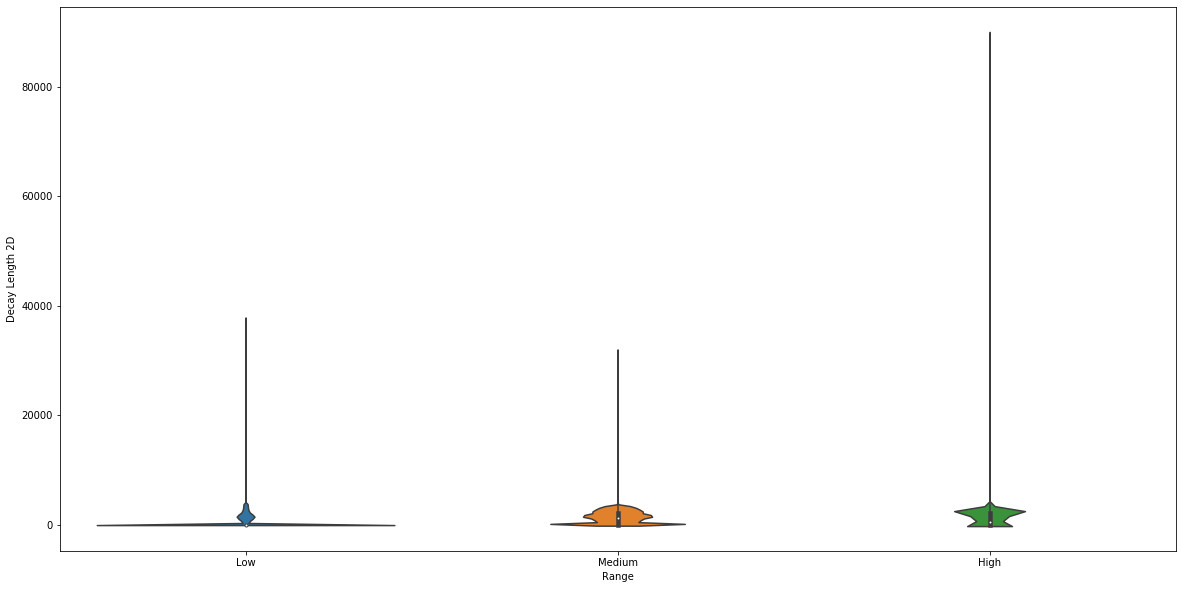

In [12]:
#Defining the ranges for low medium and high JetPt
bins = [0, 300, 500, 3000]
rangeNames = ['Low', 'Medium', 'High']
dataSet1['Range'] = pd.cut(dataSet1['JetPt'], bins, labels = rangeNames)

#Plots the 2D decay length against JetPt in low medium and high ranges
sns.violinplot(data = dataSet1, x = 'Range', y = "Decay Length 2D")

I had sectioned these ranges based on the JetPt graph I had created examining all of the data frames. I divided the ranges based on the density values of each plot. Since most of the data was under 500, I decided to take the low as anything below the median, medium up until 500 and high was anything above 500. Through this graph, it tells me that as the JetPt increases, the longer the decay length becomes. From my understanding of how Jets are formed, this makes sense as the longer the particle travel, the longer the glueons are stretched and creates more possible section for the bond to break. This theory is not backed up if I were to section the JetPt into the three ranges based on the highest JetPt and the lowest JetPt. This range looks roughtly around 0 to 2700 which if I were to divide this evenly, makes each section 900 in range.

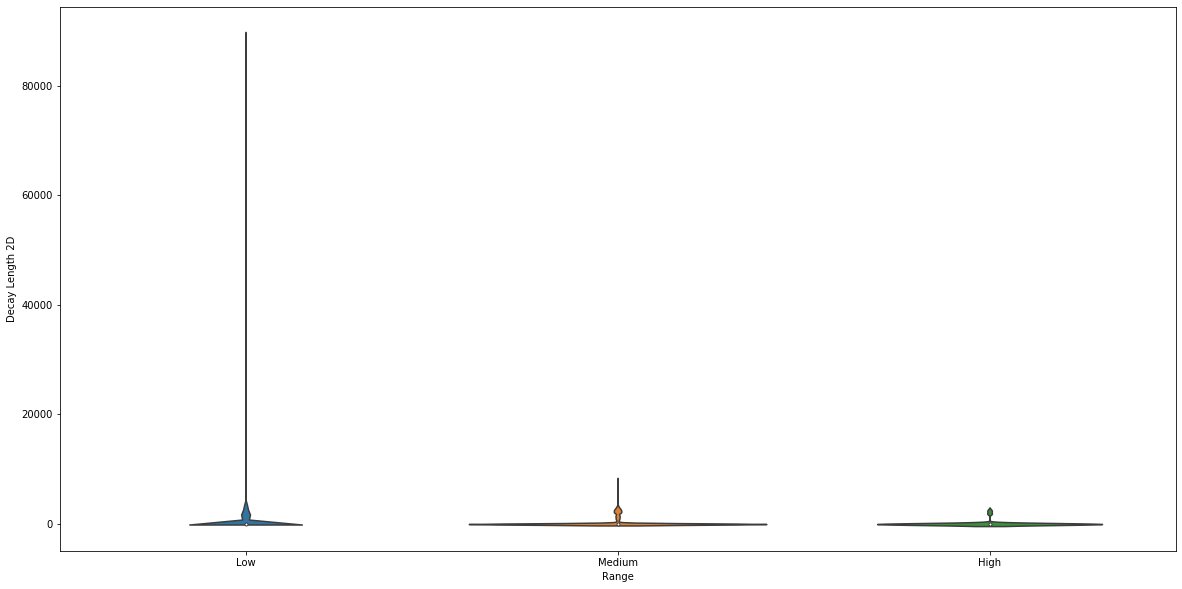

In [14]:
#Defining the ranges for low medium and high JetPt
bins = [0, 900, 1800, 2700]
rangeNames = ['Low', 'Medium', 'High']
dataSet1['Range'] = pd.cut(dataSet1['JetPt'], bins, labels = rangeNames)

#Plots the 2D decay length against JetPt in low medium and high ranges
sns.violinplot(data = dataSet1, x = 'Range', y = "Decay Length 2D")

As it is seen here, it appears that our low is now correlated with creating longer decay lengths which contradicts my previous theory. This is with making evenly divided sections. 